# Финальное задание модуля EDA-4 #

## Популярные статистические тесты в Python ##

Описание задания приведено в файле [README.md](README.md)

In [48]:
import pandas as pd
from scipy.stats import shapiro, normaltest
# from scipy.stats import ttest_ind
# from numpy.random import rand
# from scipy.stats import spearmanr
# from scipy.stats import f_oneway
# from statsmodels.stats import weightstats
# from statsmodels.stats.proportion import proportions_ztest

### Исходные массивы данных ###

In [49]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

### 1) Объединение двух массивов в DataFrame ###

In [50]:
petersburg_ser = pd.Series(data=petersburg, dtype=float, name='petersburg')
magadan_ser = pd.Series(data=magadan, dtype=float, name='magadan')
main_df = pd.DataFrame(data={'petersburg': petersburg_ser, 'magadan': magadan_ser})
display(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   petersburg  7 non-null      float64
 1   magadan     8 non-null      float64
dtypes: float64(2)
memory usage: 256.0 bytes


None

В данных по Санкт-Петербургу не хватает данных. Можно заполнить пустые ячейки средним значением

In [51]:
main_df['petersburg'].fillna(round(main_df['petersburg'].mean(), 4), inplace=True)
display(main_df)

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1034,0.0689


In [54]:
display(main_df.describe())

,petersburg,magadan
count,8.000000,8.000000
mean,0.103437,0.078012
std,0.015007,0.012945
min,0.081700,0.067700
25%,0.097250,0.068800
50%,0.102500,0.073050
75%,0.105350,0.081450
max,0.135200,0.103300


### 2) Обоснование выбора теста на корелляцию ###

Поскольку данных немного (и любые погрешности могут быть значительны), то в данном случае для проверки нормального распределения достаточно теста Шапиро-Уилка.
Из тех же соображений примем достаточно грубый уровень значимости $\alpha=0,10$

In [52]:
t1_df = main_df.copy()
bulk, pp = shapiro(t1_df['petersburg'])
print(f'Для Санкт-Петербурга p = {round(pp, 3)}')
bulk, pm = shapiro(t1_df['magadan'])
print(f'Для Магадана p = {round(pm, 3)}')

Для Санкт-Петербурга p = 0.123
Для Магадана p = 0.036


Столбец Санкт-Петербурга не укладывается в уровень значимости, и по-хорошему надо было бы проводить непараметрические тесты. Но, поскольку данных крайне мало (и любые погрешности могут быть значительны), то можно попробовать считать распределение нормальным (волевым усилием "подкрутить" уровень значимости до $\alpha=0,15$). Следовательно, можно проводить параметрические корелляционные тесты. Для наглядности можно дополнительно проверить, насколько данные отклоняются от нормального распределения.

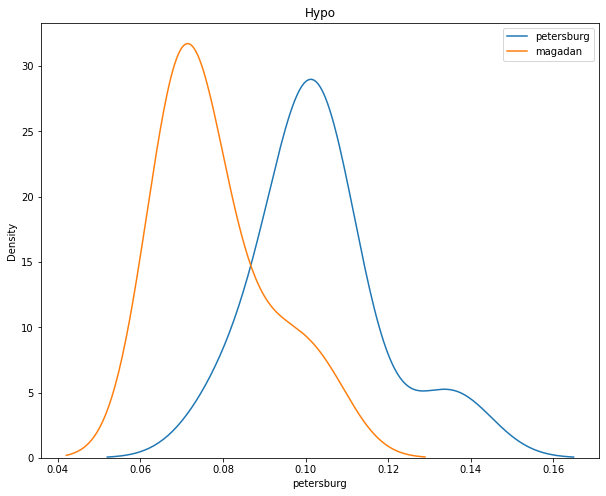

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Hypo')
sns.kdeplot(t1_df['petersburg'], ax=ax1, label='petersburg')
sns.kdeplot(t1_df['magadan'], ax=ax1, label='magadan')
plt.legend();

### 3) Тест на корелляцию ###

Размеры мидий являются непрерывными переменными. Проведём параметрический тест на корелляцию Пирсона.

In [58]:
t1_df.corr()

,petersburg,magadan
petersburg,1.000000,0.244845
magadan,0.244845,1.000000


In [59]:
t1_df.corr(method='spearman')

,petersburg,magadan
petersburg,1.000000,0.166667
magadan,0.166667,1.000000


In [60]:
t1_df.corr(method='kendall')

,petersburg,magadan
petersburg,1.000000,0.214286
magadan,0.214286,1.000000


In [61]:
from scipy.stats import pearsonr
pearsonr(t1_df['petersburg'], t1_df['magadan'])

PearsonRResult(statistic=0.24484461051559386, pvalue=0.5589340792509473)

### 4) Вывод по гипотезе ###

### 5) Тест на сравнение выборок ###

### 6) Обоснование выбоа теста на сравнение ###

### 7) Вывод по гипотезе ###